## Get your dog's food amount

In [11]:
# 구매한 사료 뒷면에 있는 표를 기준으로 값을 수정하면 사료를 바꿔도 쉽게 적정 사료 양 계산이 가능합니다.
food_recommendation_table = {
    0: {"thin": 0, "normal": 0, "fat": 0},
    2: {"thin": 54, "normal": 48, "fat": 41},
    4: {"thin": 91, "normal": 80, "fat": 69},
    6: {"thin": 123, "normal": 109, "fat": 94},
    8: {"thin": 153, "normal": 135, "fat": 116},
    10: {"thin": 181, "normal": 159, "fat": 137}
}

In [12]:
def calculate_recommended_amount(dog_weight, dog_condition):
    """
    함수#1. 강아지 몸무게와 체형을 입력받아 하루에 해당 사료를 몇 g 먹여야 하는지 계산하는 함수입니다.
    """
    # '마름', '보통', '뚱뚱' 값을 사료 기준량 표 용어와 연결
    condition_mapping = {
        "마름": "thin",
        "보통": "normal",
        "뚱뚱": "fat"
    }
    dog_condition = condition_mapping[dog_condition]

    # 사료양 근사치 계산이 용이하도록 기준값 정렬
    weight_standard = sorted(food_recommendation_table.keys())

    # 강아지 몸무게가 10kg 넘을 때, 사료양 근사치 계산을 위한 사전작업
    excess_food_amount = 0
    if dog_weight >= weight_standard[-1]:
        excess_food_amount = (dog_weight // weight_standard[-1]) * food_recommendation_table[weight_standard[-1]][dog_condition]
        dog_weight %= weight_standard[-1]

    # 강아지 몸무게 입력에 따른 사료양 근사치 계산
    for i in range(len(weight_standard) - 1):
        if weight_standard[i] <= dog_weight < weight_standard[i + 1]:
            lower_weight = weight_standard[i]
            upper_weight = weight_standard[i + 1]
            lower_food_amount = food_recommendation_table[lower_weight][dog_condition]
            upper_food_amount = food_recommendation_table[upper_weight][dog_condition]

            approximate_food_amount = lower_food_amount + (upper_food_amount - lower_food_amount) * ((dog_weight - lower_weight) / (upper_weight - lower_weight))
            return round(excess_food_amount + approximate_food_amount, 0)

In [13]:
def assess_dog_condition(ribs_visible, ribs_easily_felt, stomach_tuck, waist_visible):
    """
    함수#2. 강아지의 상태를 평가하여 체형 상태를 반환합니다.

    Parameters:
    ribs_visible (bool): 갈비뼈가 보이는지 여부
    ribs_easily_felt (bool): 갈비뼈가 쉽게 만져지는지 여부
    stomach_tuck (bool): 옆에서 봤을 때 배가 들어가 있는지 여부
    waist_visible (bool): 위에서 봤을 때 허리가 구분되는지 여부

    Returns:
    str: 강아지의 체형 상태 (마름, 보통, 뚱뚱)
    """
    # 4가지 질문에 모두 'yes'일 때, 강아지는 마른 상태 
    if ribs_visible and ribs_easily_felt and stomach_tuck and waist_visible:
        return "마름"

    # 4가지 질문에 모두 'no'일 때, 갈비뼈가 안 보이면서 쉽게 만져지지 않을 때, 강아지는 뚱뚱한 상태
    elif not ribs_visible and not ribs_easily_felt and not stomach_tuck and not waist_visible:
        return "뚱뚱"
    elif not ribs_visible and not ribs_easily_felt and stomach_tuck and waist_visible:
        return "뚱뚱"
    elif not ribs_visible and not ribs_easily_felt and stomach_tuck and not waist_visible:
        return "뚱뚱"
    elif not ribs_visible and not ribs_easily_felt and not stomach_tuck and waist_visible:
        return "뚱뚱"

    # 4가지 질문에 yes와 no가 혼합되어 있을 때 정상 상태 
    else:
        return "보통"

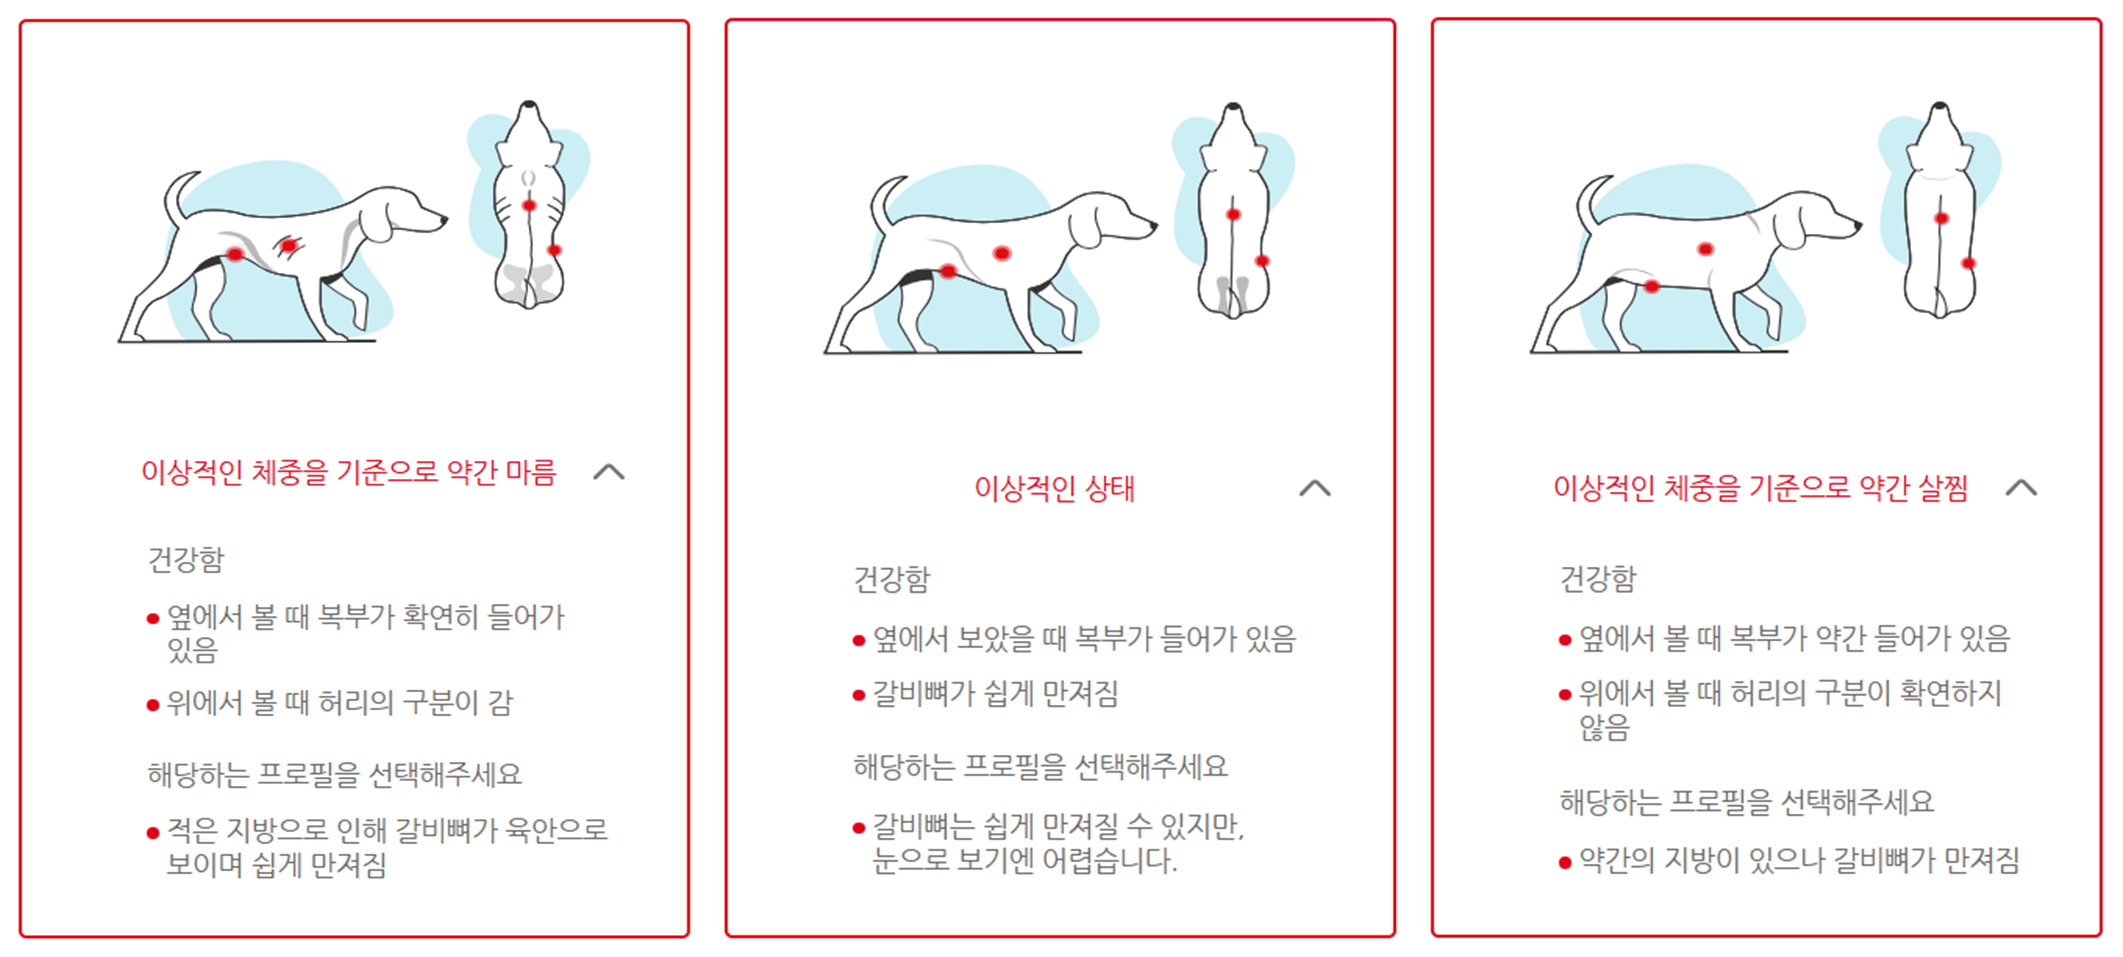

In [14]:
def adjust_for_neutered(recommended_amount, neutered):
    """
    함수#3. 중성화 수술 여부에 따라 권장 급여량을 조정하는 함수입니다. 
    neutered (bool) : 중성화 수술 함
    """
    if neutered == 'y':
        return round(recommended_amount * 0.8, 0)
    return round(recommended_amount, 0)

In [15]:
def adjust_for_activity(recommended_amount, active_time):
    """
    함수#4. 강아지 활동 시간에 따라 활동량을 평가하여 권장 급여량을 조정하는 함수입니다. 

    Parameters:
    active_time (float): 강아지의 하루 총 야외활동 시간
   
    Returns:
    str: 강아지의 활동량 (적음, 보통, 많음)
    """
    # 야외활동 시간이 1시간 이내이면 활동량이 적은 편. 권장 사료양의 10% 감소
    if active_time <= 1:
        return round(recommended_amount * 0.9, 0)

    # 야외활동 시간이 3시간 이상이면 활동량이 많은 편.권장 사료양의 10% 증가
    elif active_time >= 3:
        return round(recommended_amount * 1.1, 0)

    # 그 사이 야외활동 시간은 활동량이 평균인 편. 권장 사료양 출력
    else:
        return recommended_amount

In [16]:
from datetime import datetime, timedelta

def when_buy_food(recommended_amount, food_amount):
    """
    함수#5. 강아지 사료 양 계산을 바탕으로 며칠 뒤에 새로운 사료를 구매해야 하는지 계산하는 함수입니다.
    """
    # 사료 kg를 g으로 변환
    food_amount *= 1000 
    
    buy_day = (food_amount // recommended_amount) - 7
    buy_date = datetime.now() + timedelta(days = buy_day)
    return buy_day, buy_date.strftime("%Y-%m-%d")

In [17]:
import time
import sys

def type_like_human(text, delay=0.05):
    """
    함수#6. 타이핑 효과를 주는 함수입니다.
    """
    for char in text:
        sys.stdout.write(char)
        sys.stdout.flush()
        time.sleep(delay)
    print()

In [18]:
def how_much_to_feed_my_dog():
    """
    함수#7. 강아지에 대한 질의응답을 통해 적절한 사료 계산을 위한 함수 작동 및 결과값을 도출하는 함수입니다. 
    """
    type_like_human("적절한 사료 양을 계산하기 전에 강아지 체형🐕 진단이 먼저 필요합니다.")
    type_like_human("다만 해당 답변은 강아지를 향한 당신의 콩깍지💕로 인해 부정확할 수 있습니다. \n가급적 수의사의 진단을 통해🩺 강아지 상태를 알아내는 걸 권장합니다... \n")
    
    ribs_visible = input("옆에서 봤을 때 강아지의 갈비뼈가 피부 위로 드러나 보이나요? (y/n): ").strip().lower() == 'y'
    ribs_easily_felt = input("만졌을 때, 갈비뼈가 명확하게 느껴지나요? (y/n): ").strip().lower() == 'y'
    stomach_tuck = input("옆에서 봤을 때 배가 들어가 있나요? (y/n): ").strip().lower() == 'y'
    waist_visible = input("위에서 봤을 때 허리가 구분되나요? (y/n): ").strip().lower() == 'y'

    dog_condition = assess_dog_condition(ribs_visible, ribs_easily_felt, stomach_tuck, waist_visible)
    type_like_human(f"강아지 체형 : {dog_condition}", delay = 0.1)
    print()

    dog_weight = float(input("강아지 몸무게를 입력해 주세요(kg): "))
    if dog_weight <= 0:
        type_like_human("몸무게를 잘못 입력하셨습니다. 다시 입력해 주세요.")
        return
    
    neutered = input("강아지가 중성화 수술을 했나요? (y/n) : ").strip().lower() 
    active_time = float(input("강아지의 하루 야외활동시간은 몇 시간인가요? : "))
    
    recommended_amount = calculate_recommended_amount(dog_weight, dog_condition)
    recommended_amount = adjust_for_neutered(recommended_amount, neutered)
    recommended_amount = adjust_for_activity(recommended_amount, active_time)

    print()
    type_like_human(f"적절한 사료양을 계산 중입니다.")
    type_like_human(f"🐕 🐕 🐕 🐶", delay = 0.2)
    type_like_human(f"하루 권장 급여량은 {round(recommended_amount,0)}g 입니다.")
    print()
    
    food_amount = float(input("이번에 구매하신 사료는 몇 kg인가요? : "))
    buy_day, buy_date = when_buy_food(recommended_amount, food_amount)
    type_like_human(f"앞으로 {buy_day}일 후에 새 사료를 주문해야 합니다.. \n예상주문일자📅 : {buy_date} ")

In [10]:
how_much_to_feed_my_dog()

적절한 사료 양을 계산하기 전에 강아지 체형🐕 진단이 먼저 필요합니다.
다만 해당 답변은 강아지를 향한 당신의 콩깍지💕로 인해 부정확할 수 있습니다. 
가급적 수의사의 진단을 통해🩺 강아지 상태를 알아내는 걸 권장합니다... 



옆에서 봤을 때 강아지의 갈비뼈가 피부 위로 드러나 보이나요? (y/n):  n
만졌을 때, 갈비뼈가 명확하게 느껴지나요? (y/n):  n
옆에서 봤을 때 배가 들어가 있나요? (y/n):  y
위에서 봤을 때 허리가 구분되나요? (y/n):  n


강아지 체형 : 뚱뚱



강아지 몸무게를 입력해 주세요(kg):  7.4
강아지가 중성화 수술을 했나요? (y/n) :  y
강아지의 하루 야외활동시간은 몇 시간인가요? :  1



적절한 사료양을 계산 중입니다.
🐕 🐕 🐕 🐶
하루 권장 급여량은 78.0g 입니다.



이번에 구매하신 사료는 몇 kg인가요? :  3.5


앞으로 42.0일 후에 새 사료를 주문해야 합니다.. 
예상주문일자📅 : 2024-10-28 
